Author: Valdo Joao - valdojoao90@gmail.com <br>
Title: Data Engineering Task <br>
Date: 22/09/2019

## Event Data Analytics 

The goal of this project is to undertake analysis of event data received as a stream of events related to an individuals browsing behaviour, with each event having a number of properties which describe the users browsing.

### Event Data Model

The event data can be found within the file `sample_data_120819.tar.gz. It contains the following fields:
    
- `event_time_stamp` :- ISO formatted timestamp of when the event occured **[timestamp]**
- `beacon_id` :- id for the beacon this event is related too **[str] **
- `content_type` :- content_type of the event **[categorical str]**
- `content`:- content object containing descriptors of the event  **[JSON object]**
    

In order to understand these events it is important to note that they desrcibe the behaviour of **beacons** which appear
within an individuals browsing sessions. A **beacon** is an area of the website that a user is browsing, normally an advertisement. 

## 1 - Initial Analysis

The following cells contain a simple initial analysis of the data to illustrate how to analyse the data. <br>
Some useful python libraries for analysis are imported and the data loaded into the notebook

In [1]:
# The commands in this cell should be run if you do not have the required python packages in your environment
#import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('sample_data_190819.csv')

Before proceeding to analyse the data we view it to check it is loaded correctly and get a feel od the data we have.

In [4]:
df.head()

,event_time_stamp,beacon_id,content_type,content
0,2019-08-19 10:12:30.854 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
1,2019-08-19 10:12:43.505 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
2,2019-08-19 10:12:50.689 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
3,2019-08-19 10:13:01.101 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
4,2019-08-19 10:13:08.773 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."


In [5]:
df.describe()

,event_time_stamp,beacon_id,content_type,content
count,2910,2324,2910,2910
unique,1495,1183,5,2910
top,2019-08-13 21:33:21.336 Europe/Stockholm,0be56815-1065-4d17-8c5d-aef1e0bd3b10,application/vnd.tobii.atex.beacon-detected-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
freq,17,9,1182,1


Lets will look at the time distribution of events. 
The `event_time_stamp` column is currently formatted as an object and should be changed to a datetime in order to
allows us to manipulate and analyse it.

In [6]:
from datetime import datetime

### convert the string timestamps into datetime objects for analysis
def convert_to_datetime_hour(string, date_format = '%Y-%m-%d %H:%M:%S.%f'):
    tz_naive_string = string[:23]
    datetime_string = datetime.strptime(tz_naive_string, date_format)
    return datetime_string.replace(minute = 0, second = 0, microsecond = 0)
    
df['datetime_hour'] = df['event_time_stamp'].apply(lambda x: convert_to_datetime_hour(x))

In [7]:
keep_columns = ['datetime_hour', 'content_type']
# group the data set by 'datetime' object and count the number of events
df_date_time = df.loc[:, keep_columns].groupby('datetime_hour').count().reset_index()
df_date_time.columns = ['Hour', 'Number_Events']
print(df_date_time)

                  Hour  Number_Events
0  2019-08-13 21:00:00            126
1  2019-08-13 22:00:00              8
2  2019-08-14 09:00:00            256
3  2019-08-14 10:00:00             47
4  2019-08-14 11:00:00              5
5  2019-08-15 15:00:00              2
6  2019-08-15 16:00:00             31
7  2019-08-15 17:00:00            198
8  2019-08-15 18:00:00             21
9  2019-08-15 20:00:00            219
10 2019-08-16 07:00:00             97
11 2019-08-16 10:00:00             24
12 2019-08-16 11:00:00             36
13 2019-08-16 14:00:00            170
14 2019-08-16 15:00:00            144
15 2019-08-16 16:00:00            156
16 2019-08-16 17:00:00             12
17 2019-08-17 22:00:00             20
18 2019-08-17 23:00:00             35
19 2019-08-18 10:00:00             25
20 2019-08-18 11:00:00             31
21 2019-08-18 12:00:00            219
22 2019-08-18 13:00:00            187
23 2019-08-18 15:00:00            122
24 2019-08-18 16:00:00            241
25 2019-08-1

In [8]:
import matplotlib

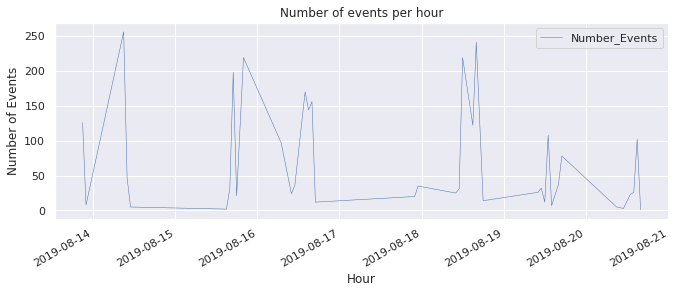

In [9]:
import matplotlib.pyplot as plt
# Will allow us to embed images in the notebook
%matplotlib inline
import seaborn as sns

sns.set(rc = {'figure.figsize':(11, 4)})
df_date_time.plot(x = 'Hour', y = 'Number_Events', linewidth = 0.5);
plt.title("Number of events per hour")
plt.ylabel("Number of Events")
plt.xlabel("Hour")
plt.show()

## 2 - JSON analysis

This part shows how to interogate the JSON `content` field in order to extract properties for analysis.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 5 columns):
event_time_stamp    2910 non-null object
beacon_id           2324 non-null object
content_type        2910 non-null object
content             2910 non-null object
datetime_hour       2910 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 113.8+ KB


In [11]:
import json

df['content_json'] = df['content'].apply(json.loads)       #Creating a column with the JSON content
df_content = pd.io.json.json_normalize(df['content_json']) #Helper function to create flat table from nested JSON

In [12]:
# remove NA's from the browser hostname data
df_hostname = df_content.loc[:,['browser.page.url.hostname', 'time.stamp']].dropna()

# create an hourly column
date_format = '%Y-%m-%dT%H:%M:%S.%f'
df_hostname['datetime_hour'] = df_hostname['time.stamp'].apply(lambda x: convert_to_datetime_hour(x, date_format))

# renaming columns
df_hostname.columns = ['Hostname', 'Datetime', 'Hour'] 

In [13]:
# grouping and counting events by hostname by hour
sorted_df = df_hostname.groupby(['Hostname']).count().reset_index().sort_values(by=['Datetime'], ascending=False)
sorted_df = sorted_df[0:5]

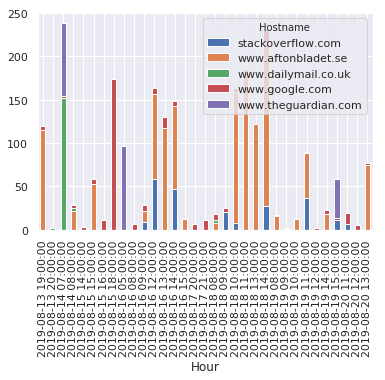

In [14]:
# plotting bar chart over time
df_hostname_popular = df_hostname[df_hostname.Hostname.isin(sorted_df['Hostname'].unique())]
df_hostname_popular.groupby(['Hour','Hostname']).size().unstack().plot(kind='bar', stacked='True')

## 3 - Analytical Question 

There is a specific field within content `beacon.meta.html`, which contains the html code found within the beacon.
The goal is to explore using regular expressions or text mining to try and identify url's that are contained here.

In [15]:
import re

#regex pattern to match url, as assumption lets say that an url has max lenght of 500 characters
pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\)]|(?:%[0-9a-fA-F][0-9a-fA-F])){5,500}'

def return_urls(html, pattern):
    
    # pre-processing for removing unwanted characters  
    bad_chars= {";":" ", "\\":" ", ",":" "}
    html_content = ''.join(bad_chars.get(x, x) for x in html)
    
    # find all the urls cointained in the html
    urls= re.findall(pattern,str(html_content))
    if(len(urls) == 0):
        print("No URL Found")
    else:
        for i in range(len(urls)): 
            print("url", i, ":", urls[i])

In [16]:
# verify if there is null data
df_content.loc[:,['beacon.meta.html']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 1 columns):
beacon.meta.html    2324 non-null object
dtypes: object(1)
memory usage: 22.8+ KB


In [17]:
# remove null data, reset the index and rename the column
df_html  = df_content.loc[:,['beacon.meta.html']].dropna().reset_index(drop=True)
df_html.columns = ['Html'] 

In [18]:
df_html.head()

,Html
0,"<html amp4ads="""" class=""i-amphtml-inabox i-amp..."
1,"<html amp4ads="""" class=""i-amphtml-inabox i-amp..."
2,"<html style=""min-height: 100vh !important; mi..."
3,"<div class=""ytp-ad-image-overlay"" style=""max-w..."
4,"<div class=""ytp-ad-image-overlay"" style=""max-w..."


In [19]:
import random

# get 4 random indexes of our data, for each of them extract all the urls 
for i in range(4):
    index = random.randrange(100)
    string = df_html.values[index][0]
    print("========================== Index %r ==========================" % (index))
    return_urls(string, pattern)

========================== Index 34 ==========================
url 0 : https://pagead2.googlesyndication.com/pagead/gen_204?id=jserror&
url 1 : https://s0.2mdn.net/879366/express_html_inpage_rendering_lib_200_246.js
url 2 : https://pagead2.googlesyndication.com/pcs/activeview?xai=AKAOjssMBUN9aXOeB4KmBeOJMltNTqbYgzKD8ahC-UsvyMg9KEEzHcfeeCkBhxUXKZJlEgGs7eo338FwUrz3edgTXl_TtVFlfHoYm8KzxvU5_4dFnp5ZF1WR9w&amp
url 3 : https://pagead2.googlesyndication.com/pagead/gen_204?id=xbid&amp
url 4 : https://googleads.g.doubleclick.net/xbbe/pixel?d=CI3lFBD2z0MY_ZLFGzAB&amp
url 5 : https://googleads.g.doubleclick.net/dbm/ad?dbm_c=AKAmf-DN7n5zXmsrAdvJp9cOzrKSaJCG20srPl1dt5YdF-t4LlWLTEEA5xrd5qemJ_u818Kup-QTXtIcd9enlPUW4BZIKz4Uuw&dbm_d=AKAmf-AaxMyhJmyQ_eLw20kMEQdl62EVlC9NNFTRcXEoRM_Z5g0RINQu-UCafvq6pOCWGxEMczuSnhDb5eyshzVmV8TnlSp2WDxmLH8Hp8SgI0_idS3LVu2NYQFh3OCopAD9-B9--PxZhz4VLwBl3hVrHcurUJkmz01JvDrsP5-C6THrU4MbmOB8yly-J5PtslX01Nq4vn2LPVV3MLkKCAuHsGIRMNw2jScM0STd2kaooi4_RjUZRij4ExcDx1H0ewIcqPYFSd1cK9LuuGG

url 0 : https://pagead2.googlesyndication.com/pagead/gen_204?id=jserror&
url 1 : https://cdn.ampproject.org/
url 2 : https://cdn.ampproject.org/rtv/011907301630320/amp4ads-v0.js
url 3 : https://cdn.ampproject.org/rtv/011907301630320/amp4ads-v0.js
url 4 : https://cdn.ampproject.org/rtv/011907301630320/v0/amp-analytics-0.1.js
url 5 : https://tpc.googlesyndication.com
url 6 : https://googleads.g.doubleclick.net/pcs/click?xai=AKAOjss7DLv-tXbW80HAs6r0xmqJIaAsNyEakfioIlWxl3Kdrqk4aawsIIBQWn_IJab8IK__3Rm4HVNK7cIvhcRILDW78n03Xof-2qSBlfoRllt7-bV7m7Re_1eXqtciAYJlpY9LvF9L8NHY7GgUICmqT6ztRnwtmpkdmP_4Q1GgU-24DqrI4iHinNAlfps9xVJcrj6WyzAnDk9KeL7pJM6uxH7CYcvPd-zLi8tigmc-FtGjfnbMCGqtKkN_wVJwg9Ih-VeRJtGe9PJAXo8rxp-IBxRrIQfGqTxRZh3768FG&amp
url 7 : https://stackoverflow.com/teams%3Futm_source%3Dso-owned%26utm_medium%3Dhouse-ad%26utm_campaign%3Dteams-slack-launch%26utm_content%3D728x90-slack-power&amp
url 8 : https://tpc.googlesyndication.com/simgad/12224834426013097647
url 9 : https://tpc.googlesyndicatio

## 4 - Modelling Question 

Although each event is quite large, there are not a huge number of distinct events to undertake prediction. However it
is interesting to model which variables may be correlated and could act as predictors of others. 

`The goal is to perform a Classification Model`:- Using the beacon_width or beacon_height, and the time of day to predict which website a beacon
    appears on.

In [20]:
# ignore output warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# verify if there is null data
df_content.loc[:,['beacon.height','beacon.width', 'browser.page.url.hostname', 'time.stamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 4 columns):
beacon.height                2324 non-null object
beacon.width                 2324 non-null object
browser.page.url.hostname    2910 non-null object
time.stamp                   2910 non-null object
dtypes: object(4)
memory usage: 91.0+ KB


In [22]:
# remove null data and populate dataframe with meaningful content for the classiffication
df_beacon = df_content.loc[:,['beacon.height','beacon.width', 
                              'browser.page.url.hostname', 'time.stamp']].dropna().reset_index(drop=True)

# exploit function convert_to_datetime_hour get datetime from string timestamps 
df_beacon['datetime_hour'] = df_beacon['time.stamp'].apply(lambda x: str(
    (convert_to_datetime_hour(x, date_format)).time()))

# rename the columns
df_beacon.columns = ['Height','Width','Hostname', 'Datetime', 'Hour'] 

# we only need hour, so we can get rid of Datetime column
del df_beacon['Datetime']

In [23]:
df_beacon.head()

,Height,Width,Hostname,Hour
0,90,728,stackoverflow.com,12:00:00
1,90,728,stackoverflow.com,12:00:00
2,272,300,www.dailymail.co.uk,20:00:00
3,0,0,www.youtube.com,15:00:00
4,94,728,www.youtube.com,14:00:00


In [24]:
# Build a dictionary that enumerates the unique values of Hostname and Hour 
unique_dict = None

def unique_list(field):
    
    unique_values = df_beacon[field].unique()
    unique_values.sort()
    
    global unique_dict
    
    unique_dict={} 
    
    for i in range(len(unique_values)): 
        unique_dict.update( {unique_values[i] : i} )
    
    return unique_dict

In [25]:
# create new columns containing the encoded values 

print("Key-Value Dictionary for Hour")
df_beacon['HourEncoded'] = df_beacon['Hour'].apply(lambda x : unique_list('Hour')[x])
for key, value in unique_dict.items(): 
    print(value, ":", key)
    
print("")

df_beacon['HostEncoded'] = df_beacon['Hostname'].apply(lambda x : unique_list('Hostname')[x])
print("Key-Value Dictionary for Hostname")
for key, value in unique_dict.items(): 
    print(value, ":", key)

Key-Value Dictionary for Hour
0 : 05:00:00
1 : 07:00:00
2 : 08:00:00
3 : 09:00:00
4 : 10:00:00
5 : 11:00:00
6 : 12:00:00
7 : 13:00:00
8 : 14:00:00
9 : 15:00:00
10 : 16:00:00
11 : 18:00:00
12 : 19:00:00
13 : 20:00:00
14 : 21:00:00

Key-Value Dictionary for Hostname
0 : dzone.com
1 : stackoverflow.com
2 : tr.letgo.com
3 : www.aftonbladet.se
4 : www.byggahus.se
5 : www.cheatsheet.com
6 : www.dailymail.co.uk
7 : www.google.com
8 : www.hygglo.se
9 : www.mkyong.com
10 : www.salon.com
11 : www.simplifiedpython.net
12 : www.sitepoint.com
13 : www.theguardian.com
14 : www.youtube.com


In [26]:
df_beacon.head()

,Height,Width,Hostname,Hour,HourEncoded,HostEncoded
0,90,728,stackoverflow.com,12:00:00,6,1
1,90,728,stackoverflow.com,12:00:00,6,1
2,272,300,www.dailymail.co.uk,20:00:00,13,6
3,0,0,www.youtube.com,15:00:00,9,14
4,94,728,www.youtube.com,14:00:00,8,14


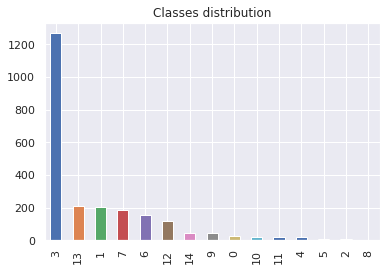

In [27]:
# Looking at the classes disribution is clear that we are in the presence of an imbalanced dataset 
df_beacon['HostEncoded'].value_counts().plot(kind='bar', title='Classes distribution');

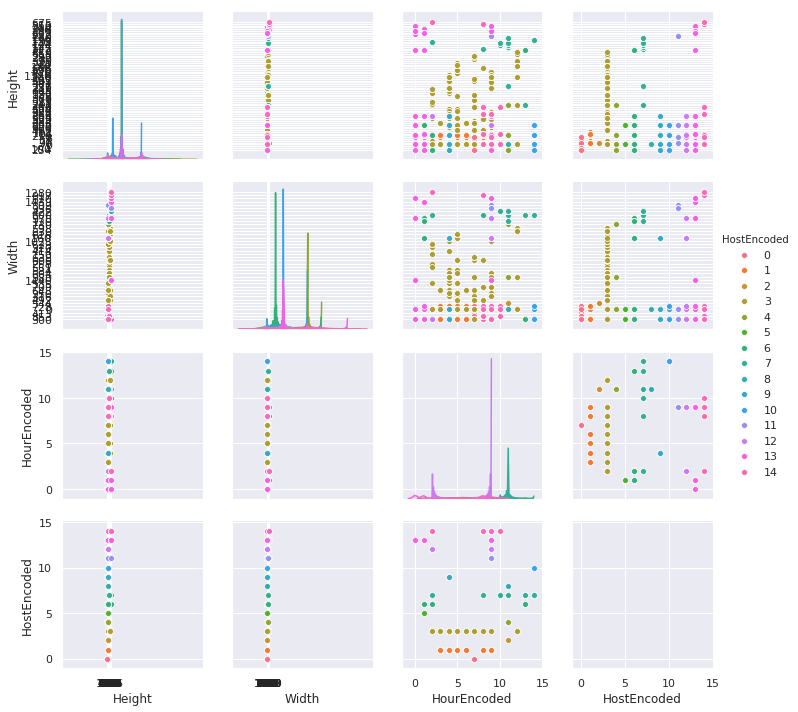

In [28]:
import seaborn as sns

sns.pairplot(df_beacon, hue="HostEncoded")

# Looking at the x axis of HostEncoded(target variable) plot is possible to see the classes distribution
# and the height give us a wider distribution compared to the width
# It is also possible to say that the classes are not linearly separable,
# they cant be neatly separated by a line
# so a single-layer neural network will not work well for this case 

In [29]:
from sklearn.preprocessing import scale

# scale all the features to make the variance among them in the same range,
# in order to prevent a particular feature to dominate others in the dataset.
x = scale(df_beacon[['Height','HourEncoded']])
y = df_beacon['HostEncoded']

In [30]:
import task_builder as tb

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import time
import math as ma

def build_train_and_evaluate(x, y, boolvar):
    
    #Build stage
    
    model = tb.get_NN_model()

    model.compile(loss = tb.loss, optimizer = tb.optimizer, metrics = tb.metrics)
    
    model.summary()
    print("")
    
    # Trainning stage
    
    #create dummy columns/One hot encoding     
    y_cat = to_categorical(y)

    #split the data for testing and for training, test = 20% and train = 80% 
    x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=42)
    
    # save parameters for Bayesian inteligent search with hyperopt and hyperas
    if (boolvar):
        tb.x_train , tb.x_test, tb.y_train, tb.y_test = x_train, x_test, y_train, y_test
    
    #dont use all the training data, take a small % of it for the validation purposes  
    
    start = time.time()
    train_model = model.fit(x_train, y_train, epochs = tb.epochs, 
                            validation_split = tb.v_split, verbose = tb.verbose)
    end = time.time()
    
    Training_time = ma.ceil((end - start)/60)
    print("Aprox training time in mins: " + str(Training_time))
    
    #plot the training history
    historydf = pd.DataFrame(train_model.history, index = train_model.epoch)    
    historydf.plot(ylim =(0,1))
    plt.title("History", fontsize = 15)
    
    
    # Evaluation stage
    
    score, acc = model.evaluate(x_train, y_train, verbose = 0)
    print("Train set accuracy:", str(round(acc,4)))
    
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)               #normalize the predictions to boolean variables
    
    #revert categorical data into classes
    y_test_class = np.argmax(y_test, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    results = np.argwhere(y_test_class == y_pred_class)   #get positive predicted results
    test_acc = len(results) / len(y_pred_class)
    print("Test set accuracy: ", str(round(test_acc, 4)))
    print("")
    
    #show the evaluation metrics (precision, recall, f1)
    print(classification_report(y_test_class, y_pred_class))

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                975       
Total para

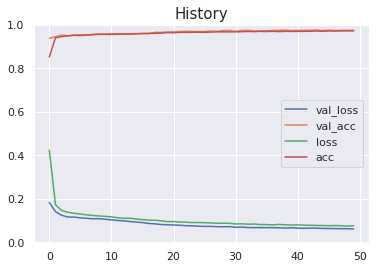

In [31]:
build_train_and_evaluate(x, y, False)

## 5 - Model Improvement 

As we saw before, the dataset is very imbalanced, so the goal is to balance the data, build, train and evaluate the new balanced data then compare the results obtained

In [32]:
#!{sys.executable} -m pip install imblearn

# As antecipated before, we have an imbalanced dataset, 
# lets try to work with smote in order to balance the dataset
from imblearn.over_sampling import SMOTE 

#Smote requires at least 3 samples from each class
#so first we need to find the classes that have less than 3 samples
df = df_beacon[df_beacon.groupby('HostEncoded').HostEncoded.transform(len) < 3]
df

,Height,Width,Hostname,Hour,HourEncoded,HostEncoded
897,0,0,www.hygglo.se,18:00:00,11,8


In [33]:
# for every class with less than 3 samples, replicate the entries two times
for i in range(2):
    df_beacon = df_beacon.append(df, ignore_index=True)

In [34]:
x = scale(df_beacon[['Height','HourEncoded']])
y = df_beacon['HostEncoded']

In [35]:
# SMOTE is an over-sampling method that creates synthetic samples of the minority classes
sm = SMOTE(random_state = 42, k_neighbors=2)
x_train_res, y_train_res = sm.fit_sample(x, y) 

In [36]:
# print the classes samples before and after applying smote
for i in range(len(df_beacon['HostEncoded'].unique())):
    print("class:", i, " Before:", sum(y == i), " - After:", sum(y_train_res == i))

class: 0  Before: 24  - After: 1267
class: 1  Before: 206  - After: 1267
class: 2  Before: 5  - After: 1267
class: 3  Before: 1267  - After: 1267
class: 4  Before: 18  - After: 1267
class: 5  Before: 6  - After: 1267
class: 6  Before: 152  - After: 1267
class: 7  Before: 183  - After: 1267
class: 8  Before: 3  - After: 1267
class: 9  Before: 45  - After: 1267
class: 10  Before: 22  - After: 1267
class: 11  Before: 18  - After: 1267
class: 12  Before: 120  - After: 1267
class: 13  Before: 210  - After: 1267
class: 14  Before: 47  - After: 1267


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                975       
Total para

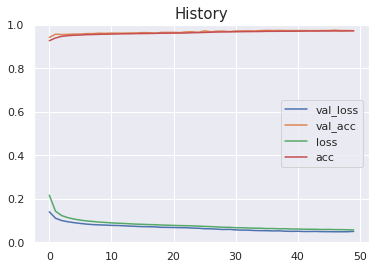

In [37]:
build_train_and_evaluate(x_train_res, y_train_res, True)

Although the test accuracy is almost the same as before, the minority classes have improved a lot their scores.
So we can say that the model is performing better than before while classifying the classes 
even though accuracy is similar. This can prove that Precision-Recall 
are a useful measure of success of prediction when the classes are very imbalanced. 

## 6 - Bayesian inteligent search of hyper-parameter combination

Use Bayesian search to find the hyperparameters that return the model best performance.

In [38]:
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe, rand
from hyperas import optim

In [39]:
def create_model():
    
    model = tb.Sequential()
    
    model.add(tb.Dense(128, input_shape = (tb.input_size,), activation = tb.activation))
    model.add(tb.Dropout({{uniform(0, 1)}}))
    model.add(tb.Dense({{choice([32, 64, 128])}}, activation = tb.activation))
    model.add(tb.Dropout({{uniform(0, 1)}}))
    model.add(tb.Dense({{choice([32, 64, 128])}}, activation = tb.activation))
    model.add(tb.Dropout({{uniform(0, 1)}}))
    model.add(tb.Dense(tb.output_size, activation = tb.output_activation))

    model.compile(loss = tb.loss, optimizer = {{choice(['rmsprop', 'adam', 'sgd'])}}, 
                  metrics = tb.metrics)
    
    result = model.fit(tb.x_train, tb.y_train,
              batch_size = {{choice([16, 32, 64, 128])}},
              epochs = {{choice([50, 100, 150, 200])}},
              verbose = tb.verbose,
              validation_split = tb.v_split)    

    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [40]:
def data():
    
    return tb.x_train , tb.x_test, tb.y_train, tb.y_test

In [41]:
start = time.time()

best_run, best_model = optim.minimize(model = create_model,
                                          data = data,
                                          algo = tpe.suggest,
                                          max_evals = 5,
                                          trials = Trials(),
                                          notebook_name ='task')

end = time.time()

Training_time = ma.ceil((end - start)/60)
print("Aprox hyper-parameter search time in mins: " + str(Training_time))

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from datetime import datetime
except:
    pass

try:
    import matplotlib
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import json
except:
    pass

try:
    import re
except:
    pass

try:
    import random
except:
    pass

try:
    import warnings
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    from sklearn.preprocessing import scale
except:
    pass

try:
    import task_builder as tb
except:
    pass

try:
    from keras.utils.np_utils import to_categorical
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
except:
    pass

try:
    import time
except:
    pass

try:
    import math as ma
except:


In [42]:
x_train, x_test, y_train, y_test = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(x_test, y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

Evalutation of best performing model:
3801/3801 [==============================] - 1s 353us/step
[0.05731355331757764, 0.9693063470885115]
Best performing model chosen hyper-parameters:
{'Dense': 2, 'Dense_1': 1, 'Dropout': 0.14514364721165218, 'Dropout_1': 0.47268542196596874, 'Dropout_2': 0.7275581656084844, 'batch_size': 2, 'epochs': 2, 'optimizer': 1}
